# Import Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Data Understanding

In [24]:
data = pd.read_csv('BostonHousing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


There's no Missing Values!

In [4]:
data.duplicated().sum()

0

There's no duplicate data!

In [5]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


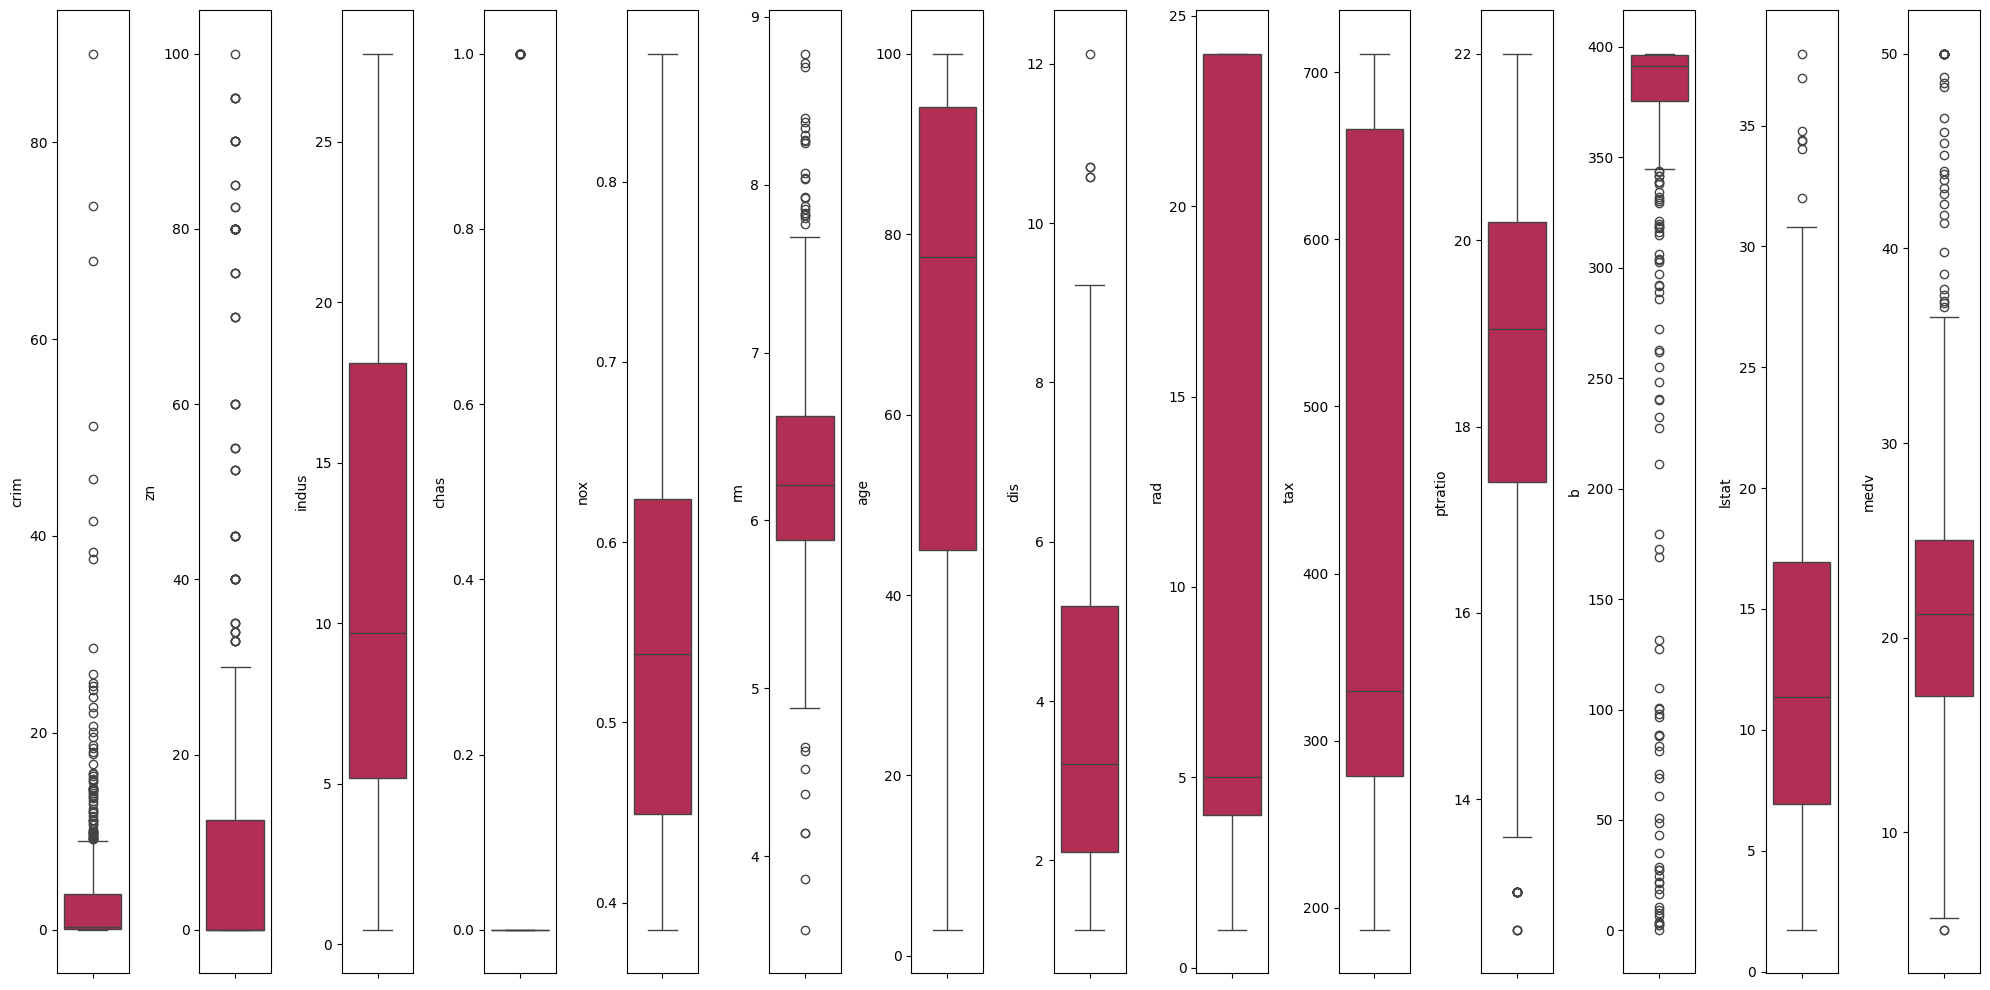

In [6]:
plt.figure(figsize=(20,10))

# plotting
features = data.select_dtypes(include=['number']).columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='#c9184a')
    plt.tight_layout()

In [7]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound))



# Count outliers in each numerical column
outliers_count = data.apply(detect_outliers).sum()
outliers_count

crim       66
zn         68
indus       0
chas       35
nox         0
rm         30
age         0
dis         5
rad         0
tax         0
ptratio    15
b          77
lstat       7
medv       40
dtype: int64

There's no need for further data cleaning because the current features are sufficient for modelling. Given the quality and completeness of the existing features, we can proceed with building and training our models without additional preprocessing.

## Data Preparation

Sets 'medv' as the target variable

In [8]:
# Split into pre-training and test
X = data.drop(columns='medv')
y = data[['medv']]

X_pretrain, X_test, y_pretrain, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## Multicollinearity Study

In [9]:
# Check Vif Score
vif_X = add_constant(X_pretrain)

vif_data = pd.DataFrame([vif(vif_X.values, i)
               for i in range(vif_X.shape[1])],
              index=vif_X.columns).reset_index()
vif_data.columns = ['feature','vif_score']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


There are several features with moderately high VIF scores:
1. **dis** and **nox** feature exhibit moderate VIF scores
2. **rad** and **tax** feature show moderate to high VIF scores
  
Therefore, we will proceed by creating a heatmap correlation to decide which features to drop

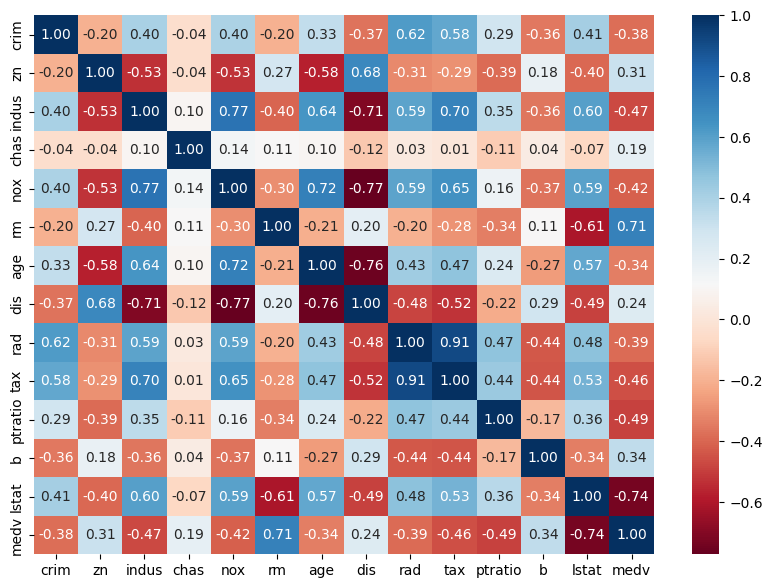

In [10]:
# heatmap correlation
medv_train = pd.concat([X_pretrain, y_pretrain], axis=1)
corr = medv_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt='.2f')
plt.show()

- **Tax** and **rad** exhibit a strong correlation with each other. However, we need to **retain tax** due to its significant correlation with medv, which serves as our target variable.
- **nox**, **indus**, and **age** also show a moderate correlation with dis, but there's no need to retain because they also exhibit significant correlations with medv.
- Both, **lstat** and **rm** have a high correlation with medv

In [11]:
# drop redundant features
X_pretrain = X_pretrain.drop(columns=['rad'])
X_test = X_test.drop(columns=['rad'])

In [12]:
# Chech the Vif score again
vif_X = add_constant(X_pretrain)

vif_data = pd.DataFrame([vif(vif_X.values, i)
               for i in range(vif_X.shape[1])],
              index=vif_X.columns).reset_index()
vif_data.columns = ['feature','vif_score']
vif_data = vif_data.loc[vif_data.feature!='const']
vif_data

,feature,vif_score
1,crim,1.593872
2,zn,2.413664
3,indus,3.658237
4,chas,1.084671
5,nox,4.411973
6,rm,1.884987
7,age,2.977080
8,dis,4.166015
9,tax,3.331299
10,ptratio,1.776290


Now, VIF score already looks good!

# Model Training

In [13]:
X = data.drop(columns='medv')
y = data[['medv']]

# Splitting into train and validation
X_train, X_validation, y_train, y_validation = train_test_split(X_pretrain, y_pretrain, test_size=0.20, random_state=42)

## Ridge Regression

### Choosing the best Lambda

In [14]:
# Train the model
X_medv_train = X_train.to_numpy()
y_medv_train = y_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# Define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_medv_train, y_medv_train)
ridge_reg_pointone.fit(X_medv_train, y_medv_train)
ridge_reg_one.fit(X_medv_train, y_medv_train)
ridge_reg_ten.fit(X_medv_train, y_medv_train)

Ridge(alpha=10, random_state=42)

In [15]:
X_medv_validation = X_validation.to_numpy()
y_medv_validation = y_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation, y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.960676932957843
RMSE of Ridge regression model with alpha = 0.1 is 4.94941253512279
RMSE of Ridge regression model with alpha = 1.0 is 4.912351371579992
RMSE of Ridge regression model with alpha = 10 is 4.871717983886228


The Ridge regression model with **alpha=10** has the smallest Root Mean Squared Error (RMSE) among all the models tested. This indicates that it performs the best in terms of accurately predicting the target variable.

### Ridge Coefficientt

In [16]:
ridge_best = ridge_reg_ten

coef_ridge_medv = pd.DataFrame({
    'feature':['intercept'] + X_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_ridge_medv

,feature,coefficient
0,intercept,15.064666
1,crim,-0.071408
2,zn,0.033030
3,indus,-0.067858
4,chas,1.955801
5,nox,-1.568248
6,rm,4.783168
7,age,-0.011523
8,dis,-1.260056
9,tax,-0.001976


## Lasso Regression

### Choosing the best Lambda

In [17]:
# train the model
X_medv_train = X_train.to_numpy()
y_medv_train = y_train.to_numpy()
y_medv_train = y_medv_train.reshape(len(y_medv_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_medv_train, y_medv_train)
lasso_reg_pointone.fit(X_medv_train, y_medv_train)
lasso_reg_one.fit(X_medv_train, y_medv_train)
lasso_reg_ten.fit(X_medv_train, y_medv_train)

Lasso(alpha=10, random_state=42)

In [18]:
from sklearn.metrics import mean_squared_error

X_medv_validation = X_validation.to_numpy()
y_medv_validation = y_validation.to_numpy()
y_medv_validation = y_medv_validation.reshape(len(y_medv_validation),)

alphas = [0.01, 0.1, 1, 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_medv_validation)
    rmse = np.sqrt(mean_squared_error(y_medv_validation, y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 4.934105658639752
RMSE of Lasso regression model with alpha = 0.1 is 4.907145314259478
RMSE of Lasso regression model with alpha = 1 is 4.845855910636398
RMSE of Lasso regression model with alpha = 10 is 5.426622694252769


Among the models evaluated, the Lasso regression model with an alpha value of 11 demonstrates the lowest Root Mean Squared Error (RMSE). This suggests that it has the highest predictive accuracy

In [19]:
lasso_best = lasso_reg_one

coef_medv_lasso = pd.DataFrame({
    'feature':['intercept'] + X_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_medv_lasso

,feature,coefficient
0,intercept,25.823435
1,crim,-0.041076
2,zn,0.025273
3,indus,-0.000000
4,chas,0.000000
5,nox,-0.000000
6,rm,2.504122
7,age,0.022055
8,dis,-0.599362
9,tax,-0.002994


# Diagnostic Study

## Ridge Regression

R-squared for training data is 0.7485875263669821


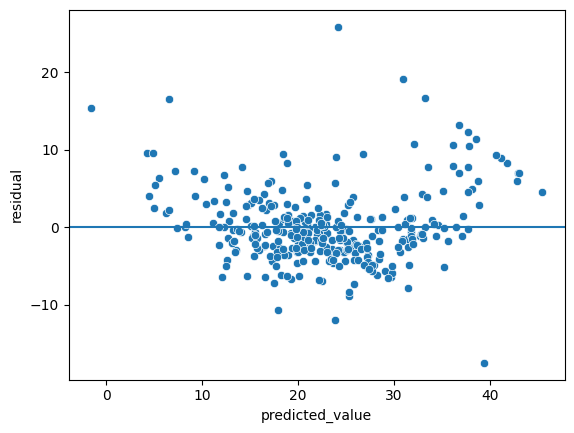

In [20]:
# R2 Score
y_predict_train_ridge = ridge_best.predict(X_medv_train)
print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train_ridge)))

# calculate residuals
residual = y_medv_train - y_predict_train_ridge

# prepare dataframe
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train_ridge,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

**Interpretation** :
1. Linear relationship: OK. The horizontal line at 𝑦=0 adequately represents the overall distribution of the residual points
2. Variance stable: OK. The variance of the residuals appears to be relatively consistent
3. Independent residual: The assumption of independent residuals is not satisfied. There is a noticeable pattern in the residuals, indicating that residuals for nearby observations are correlated.
4. R-Squared: The model has a good fit, as indicated by an R-squared value of 74%. This means that 74% of the variance in the response variable is successfully explained by the model

## Lasso Regression

R-squared for training data is 0.7056815963218595


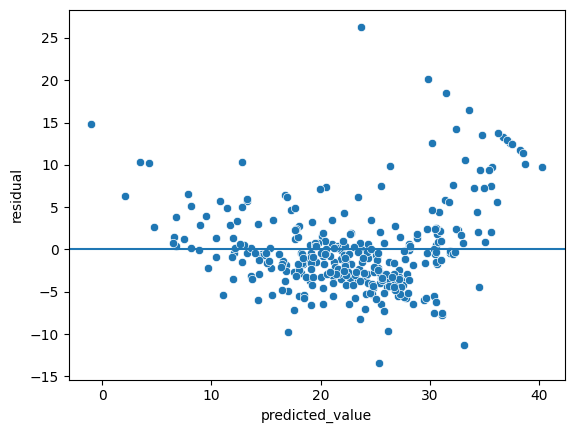

In [21]:
# R2 Score
y_predict_train_lasso = lasso_best.predict(X_medv_train)
print('R-squared for training data is {}'.format(r2_score(y_medv_train, y_predict_train_lasso)))

# calculate residuals
residual = y_medv_train - y_predict_train_lasso

# prepare dataframe
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train_lasso,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

**Interpretation** :
1. Linear relationship: OK. The horizontal line at 𝑦=0 adequately represents the overall distribution of the residual points
2. Variance stable: The assumption of homoscedasticity is not entirely met. The variance of the residuals appears to be inconsistent
3. Independent residual: NO. There is a noticeable pattern in the residuals, indicating that residuals for nearby observations are correlated.
4. R-Squared: The model has a good fit, as indicated by an R-squared value of 70%. This means that 70% of the variance in the response variable is successfully explained by the model

# Model Evaluation

## Ridge Regression

In [22]:
# Predictions on training data
y_predict_train_ridge = ridge_best.predict(X_medv_train)
train_rmse_ridge = np.sqrt(mean_squared_error(y_medv_train, y_predict_train_ridge))
train_mae_ridge = mean_absolute_error(y_medv_train, y_predict_train_ridge)
train_mape_ridge = mean_absolute_percentage_error(y_medv_train, y_predict_train_ridge)

# Predictions on test data
X_medv_test = X_test.to_numpy()
y_predict_test_ridge = ridge_best.predict(X_medv_test)
y_medv_test = y_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)
test_rmse_ridge = np.sqrt(mean_squared_error(y_medv_test, y_predict_test_ridge))
test_mae_ridge = mean_absolute_error(y_medv_test, y_predict_test_ridge)
test_mape_ridge = mean_absolute_percentage_error(y_medv_test, y_predict_test_ridge)

# Calculate differences
rmse_diff_ridge = test_rmse_ridge - train_rmse_ridge
mae_diff_ridge = test_mae_ridge - train_mae_ridge
mape_diff_ridge = test_mape_ridge - train_mape_ridge

# Create a DataFrame to compare results
results = pd.DataFrame({
    'Ridge': ['Train', 'Test', 'Differences'],
    'RMSE': [train_rmse_ridge, test_rmse_ridge, rmse_diff_ridge],
    'MAE': [train_mae_ridge, test_mae_ridge, mae_diff_ridge],
    'MAPE': [train_mape_ridge, test_mape_ridge, mape_diff_ridge]
})

print(results)

         Ridge      RMSE       MAE      MAPE
0        Train  4.778640  3.377676  0.168681
1         Test  5.158908  3.244482  0.176184
2  Differences  0.380268 -0.133195  0.007503


## Lasso Regression

In [23]:
# Predictions on training data
y_predict_train_lasso = lasso_best.predict(X_medv_train)
train_rmse_lasso = np.sqrt(mean_squared_error(y_medv_train, y_predict_train_lasso))
train_mae_lasso = mean_absolute_error(y_medv_train, y_predict_train_lasso)
train_mape_lasso = mean_absolute_percentage_error(y_medv_train, y_predict_train_lasso)

# Predictions on test data
X_medv_test = X_test.to_numpy()
y_predict_test_lasso = lasso_best.predict(X_medv_test)
y_medv_test = y_test.to_numpy()
y_medv_test = y_medv_test.reshape(len(y_medv_test),)
test_rmse_lasso = np.sqrt(mean_squared_error(y_medv_test, y_predict_test_lasso))
test_mae_lasso = mean_absolute_error(y_medv_test, y_predict_test_lasso)
test_mape_lasso = mean_absolute_percentage_error(y_medv_test, y_predict_test_lasso)

# Calculate differences
rmse_diff_lasso = test_rmse_lasso - train_rmse_lasso
mae_diff_lasso = test_mae_lasso - train_mae_lasso
mape_diff_lasso = test_mape_lasso - train_mape_lasso

# Create a DataFrame to compare results
results = pd.DataFrame({
    'Ridge': ['Train', 'Test', 'Differences'],
    'RMSE': [train_rmse_lasso, test_rmse_lasso, rmse_diff_lasso],
    'MAE': [train_mae_lasso, test_mae_lasso, mae_diff_lasso],
    'MAPE': [train_mape_lasso, test_mape_lasso, mape_diff_lasso]
})

print(results)

         Ridge      RMSE       MAE      MAPE
0        Train  5.170346  3.685842  0.174913
1         Test  5.125494  3.398051  0.178566
2  Differences -0.044852 -0.287791  0.003653


Our target medv is ranged from 5 to 40. RMSE and MAE of that magnitude is of around 10%. Good.
MAPE of 17% is also considered good --> model performs well and doesn't underfit
Difference between training and testing model performance is also less than 10%. Model doesn't overfit

Our target medv is ranged from 5 to 40. RMSE and MAE of that magnitude is of around 15%. Still good.
MAPE of 17% is also considered good --> model performs well and doesn't underfit
Difference between training and testing model performance is less than 10%. Model doesn't overfit

**INTERPRETATION**

1. The MAE values for the testing data using the Ridge and Lasso models are 3.24 and 3.39, respectively, with MAPE percentages of 17.6% and 17.8%. MAPE values between 10% and 20% indicate a good level of prediction accuracy and suggest that the models are not underfitting.

2. The models do not exhibit overfitting as the test error values differ minimally from the train error values, both being below 1%.